El teorema del limite central establece que las medias provenientes de muestras grandes tomadas de poblaciones con una distribucion desconocida, se distribuyen normalmente con media y varianza normal.

In [1]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import math

La media aritmetica: 
<center>
$Xmedio = \frac{ \Sigma Xi}{N}$
</center>
Donde N es el cardinal de la muestra.
Entonces para calcula la varianza muestral hacemos:
<center>
$ S^2 = \frac{\Sigma (Xi - Xmedio)^2}{N-1}$
</center>

Para este ejercicio usaremos una muestra de datos.

In [2]:
#Cargamos el archivo.  
data = np.genfromtxt('cumulos_globulares.dat', usecols=6) #Son magnitudes de estrellas en un cúmulo
# data tiene NaNs, así que usamos solo los numéricos.
data = data[~np.isnan(data)]

In [3]:
len(data)

148

In [4]:
def Varianza(a = data):
    n = len(a)
    S = []
    Xm = sum(a)/n
#      Xm es la media
    
    for j in (a):
        xi = (j - Xm)**2
        S.append(xi)
    S2 = sum(S)/(n-1)
    return(S2)
        

In [5]:
Varianza()

2.225189740761169

Esta la varianza para 'data'.

Quiero hacer varias muestras usando data, sin resposicion, que sortee valores aleatorios en la lista y crear un grafico de las varianzas que obtengo

In [6]:
def muestra():
    X = []
    for i in range (len(data)):
        x = data [randint(0,len(data)-1)]
        X.append(x)   
    return (X)
# Esto funcion me genera una muestra eligiendo de manera aleatoria los valores de data

In [7]:
lista = []
for i in range (10000):
#     Hago muchas muestras
     m = muestra()
     lista.append(m)
#         Creo una lista de muestras aleaotorias

In [8]:
# Para chequear
print(len(lista))
# Veo cuantos elementos tiene la lista
print(len(lista[1]))
# Veo cuantos elementos tiene un elemento de la lista, deben coincidir con len(data)

10000
148


Ahora quiero calcular la varianza de cada una

In [9]:
M = [] 
for i in (lista):
        s = Varianza(i)
        M.append(s)          

In [10]:
len(M)

10000

Text(0, 0.5, 'Conteo')

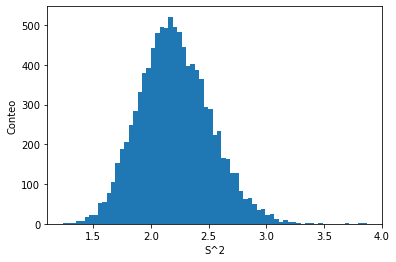

In [11]:
plt.hist(M, bins = 'fd')
plt.xlabel('S^2')
plt.ylabel('Conteo')

Quiero obtener el intervalo de confianza dado un alpha, para esto reordeno los valores de la varianza y obtengo los cuantiles con ese alpha.

In [12]:
M.sort()

In [13]:
def IC(a = 0.05):
#     a = alpha
    IC = []
    q1 = a/2
    q2 = 1 - a/2
    for i in range (len(M)):
        if (i+1)/(len(M)+1) >= q1:
            S1 = M[i]
            break
#             encuentro el cuantil para alpha/2
    for i in range(len(M)):
        if (i+1)/(len(M)+1) >= q2:
            S2 = M[i]
            break
#             Encuentro el quantil para 1 - alpha/2
    S0 = np.mean(M)
    print('El valor medio de los bootstrap es:',S0,'Intervalo de confianza:', S1, S2)
    plt.hist(M, bins = 'fd')
    plt.xlabel('S^2')
    plt.ylabel('Conteo')
    plt.axvline(x=S1, c='red',lw = 2)
    plt.axvline(x=S2, c='red', lw = 2)
    plt.axvline(x=S0, c='green', lw = 2)

El valor medio de los bootstrap es: 2.2091925779044863 Intervalo de confianza: 1.6483304467733029 2.850339069681927


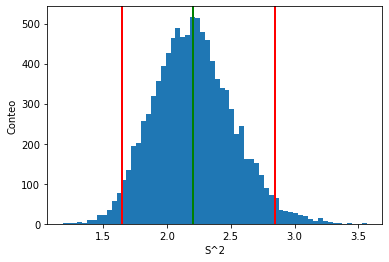

In [55]:
IC()

El valor medio de los bootstrap es: 2.2084186531885455 Intervalo de confianza: 1.4964767972053674 3.056757823129253


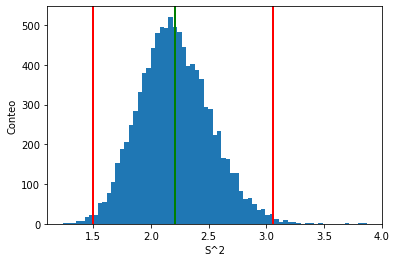

In [14]:
IC(a = 0.01)

El valor medio de los bootstrap es: 2.2084186531885455 Intervalo de confianza: 1.7257494943923513 2.737089060489061


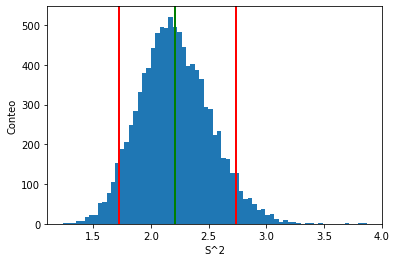

In [17]:
IC(a = 0.1)

Vemos que con un $alpha$ mas grande el IC se hace mas chico.